In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# skimage.color

Do the [color space](https://zh.wikipedia.org/wiki/%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%96%93) conversion.
Such as:
1. RGB to HSV color space conversion. (``rgb2hsv``)
2. RGB to XYZ color space conversion. (``rgb2xyz``)
3. RGB to RGB CIE color space conversion. (``rgb2rgbcie``)
4. CIE-LAB to CIE-LCH color space conversion. (``lab2lch``)

... 
and so on.

You can also use ``convert_colorspace(img, fromspace, tospace)`` to convert color space.

The valid color spaces are:
‘[RGB](https://zh.wikipedia.org/zh-tw/%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%96%93)’, ‘[HSV](https://zh.wikipedia.org/wiki/HSL%E5%92%8CHSV%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%97%B4)’, ‘[RGB CIE](https://zh.wikipedia.org/wiki/CIE1931%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%97%B4)’, ‘[XYZ](https://zh.wikipedia.org/wiki/CIE1931%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%97%B4)’, ‘[YUV](https://zh.wikipedia.org/wiki/YUV)’, ‘[YIQ](https://zh.wikipedia.org/wiki/YIQ)’, ‘[YPbPr](https://zh.wikipedia.org/wiki/YCbCr)’, ‘[YCbCr](https://zh.wikipedia.org/wiki/YCbCr)’, ‘[YDbDr](https://zh.wikipedia.org/zh-tw/YDbDr)’


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

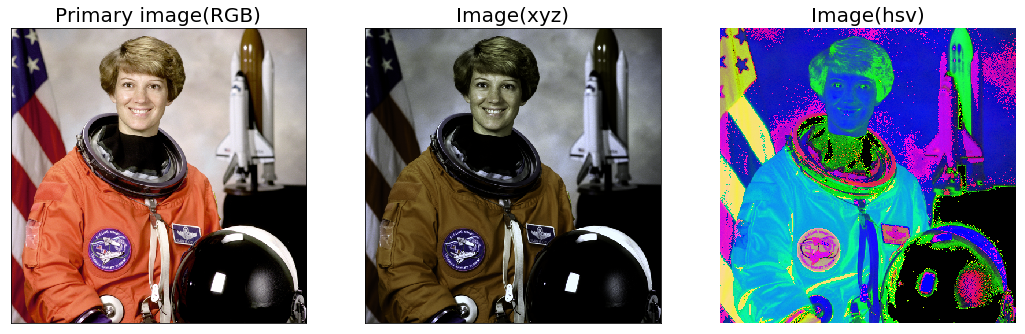

In [3]:
from skimage import io
from skimage import data
from skimage import color

# primary image (RGB)
img = data.astronaut()

# convert RGB into xyz
img_xyz = color.rgb2xyz(img)

# convert RGB into HSV
img_hsv = color.convert_colorspace(img, 'RGB', 'HSV')

plt.figure(figsize=(18, 32))
plt.subplot(131)
plt.yticks([])
plt.xticks([])
plt.title('Primary image(RGB)',fontsize=20)
plt.imshow(img)

plt.subplot(132)
plt.yticks([])
plt.xticks([])
plt.title('Image(xyz)',fontsize=20)
plt.imshow(img_xyz)

plt.subplot(133)
plt.yticks([])
plt.xticks([])
plt.title('Image(hsv)',fontsize=20)
plt.imshow(img_hsv)
plt.axis('off')

Because the matplotlib.imshow only shows the rgb colorspace,

we shouldn't display hsv image in rgb colorspace.

This example to verify whether the convertion is correct (RGB to HSV).

![](https://i.imgur.com/0jVmBDV.png)


[255 255 255 255 255 255 255 255 255 255]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


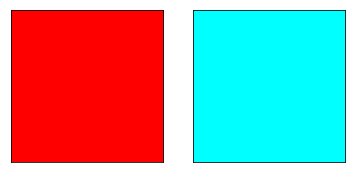

In [4]:
red = io.imread('http://c1.staticflickr.com/1/499/31652870824_2982786732_o.jpg')
red[red > 200] = 255
red[red < 100] = 0

hsv = color.convert_colorspace(red, 'RGB', 'HSV')
print(red[:,:,0][0][0:10]) # [255 255 ... 255]
print(hsv[:,:,0][0][0:10]) # [0 0 0 ... 0 0 ]
print(hsv[:,:,1][0][0:10]) # [1 1 1 ... 1 1 ]
print(hsv[:,:,2][0][0:10]) # [1 1 1 ... 1 1 ]

plt.subplot(121)
plt.yticks([])
plt.xticks([])
plt.imshow(red)

# the hsv color space shows in rgb color space 
# so the output will not be correct 
plt.subplot(122)
plt.yticks([])
plt.xticks([])
plt.imshow(hsv) 


You can also create an RGB representation of a gray-level image.(``gray2rgb``)

(256, 256)
(256, 256, 3)


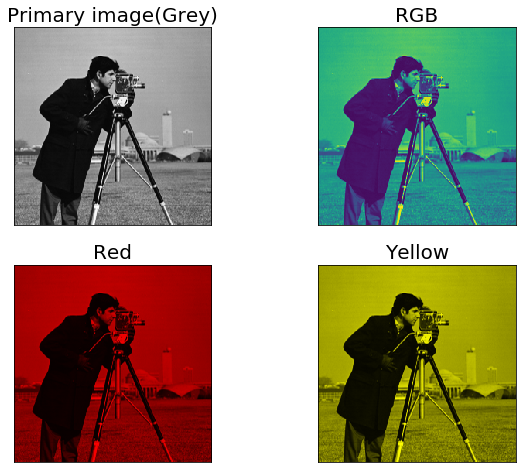

In [5]:
from skimage import img_as_float

# gray level
grayscale_image = img_as_float(data.camera()[::2, ::2])

# convert gray level to rgb
img = color.gray2rgb(grayscale_image)
print(grayscale_image.shape)  # (256, 256)
print(img.shape) #(256, 256,3)

# show the image is converted correctly
red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]

img_red = red_multiplier * img
img_yellow = yellow_multiplier * img

plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.yticks([])
plt.xticks([])
plt.title('Primary image(Grey)',fontsize=20)
plt.imshow(img)

plt.subplot(222)
plt.yticks([])
plt.xticks([])
plt.title('RGB',fontsize=20)
plt.imshow(grayscale_image)

plt.subplot(223)
plt.yticks([])
plt.xticks([])
plt.title('Red',fontsize=20)
plt.imshow(img_red)

plt.subplot(224)
plt.yticks([])
plt.xticks([])
plt.title('Yellow',fontsize=20)
plt.imshow(img_yellow)


This example shows that you can label the spcific value, then convert the value into another color value.(``color.label2rgb``)

C:\Users\USER\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


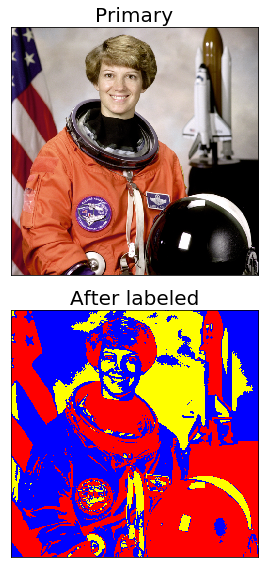

In [6]:
import numpy as np

img = data.astronaut()
gray = color.rgb2gray(img)
rows,cols = gray.shape
labels = np.zeros([rows,cols])

# use for loop to label the image 
for i in range(rows):
    for j in range(cols):
        if(gray[i,j]<0.4):
            labels[i,j]=0
        elif(gray[i,j]<0.75):
            labels[i,j]=1
        else:
            labels[i,j]=2
            
# change the color which is labeled
dst = color.label2rgb(labels)

plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.yticks([])
plt.xticks([])
plt.title('Primary',fontsize=20)
plt.imshow(img)

plt.subplot(212)
plt.yticks([])
plt.xticks([])
plt.title('After labeled',fontsize=20)
plt.imshow(dst)
io.imshow(dst)

# skimage.exposure

## [Histogram Equalization](https://zh.wikipedia.org/wiki/%E7%9B%B4%E6%96%B9%E5%9B%BE%E5%9D%87%E8%A1%A1%E5%8C%96)

This method usually increases the global contrast of images, especially when the usable data of the image is represented by close contrast values. Through this adjustment, the intensities can be better distributed on the histogram. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the most frequent intensity values.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


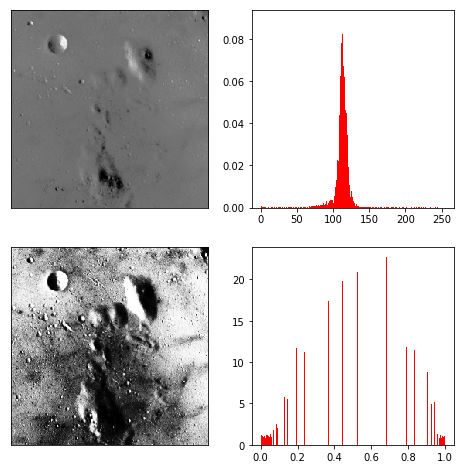

In [7]:
from skimage import exposure
plt.figure("hist",figsize=(8,8))

img_prim = data.moon() # 221

# return a copy of the array collapsed into one dimension
arr_prim = img_prim.flatten() #222




# the image do the histogram equalization 
image_hist = exposure.equalize_hist(img_prim) # 223

arr_hist = image_hist.flatten() # 224

# primary image
plt.subplot(221)
plt.imshow(img_prim, plt.cm.gray)  
plt.yticks([])
plt.xticks([])

# histogram of primary image 
plt.subplot(222)
plt.hist(arr_prim, bins=256, normed=1,edgecolor='None',facecolor='red') 

plt.subplot(223)
plt.imshow(image_hist,plt.cm.gray)
plt.yticks([])
plt.xticks([])

plt.subplot(224)
plt.hist(arr_hist, bins=256, normed=1,edgecolor='None',facecolor='red') 
plt.show()

## correction
1. [Gamma Correction](https://zh.wikipedia.org/wiki/%E4%BC%BD%E7%91%AA%E6%A0%A1%E6%AD%A3)(``adjust_gamma()``)
2. Sigmoid Correction (``adjust_sigmoid()``)
3. Logarithmic correction (``adjust_log()``)

### What is gamma

The light emitted is in fact roughly proportional to the volt-age raised to a power; this power is called gamma,with symbol γ.

### Why do we use the gamma correction?
Thus, if the file value in the red channel is R, the screen emits light proportional to
R^γ, with spectral power distribution(SPD) equal to that of the red phosphor paint on the screen that is the target of the
red-channel electron gun. The value of gamma is around 2.2.
Since the mechanics of a television receiver are the same as those for a computer Cathode ray tube(CRT),
TV systems precorrect for this situation by applying the inverse transformationbefore transmitting
TV voltage signals. It is customary to append a prime to signals that are "gammacorrected"
by raising to the power (l/γ) before transmission. Thus we arrive at linear signals:
![](https://i.imgur.com/G3UlBR6.png)


This is an example shows that human's vision is not in linear.

The primary image shows in linear value of graylevel. But in our vision, we think it's in nonlinear.

The primary image after doing with gamma correction, we'll think it's in linear


Primary image.
![primary](https://i.imgur.com/Er4QJG6.png)

With gamma correction.
![gamma correction](https://i.imgur.com/Ekgchkx.png)

### Show the images with different gamma value. ( dark to light )
The picture is from [wiki/Gamma_correction](https://en.wikipedia.org/wiki/Gamma_correction)

C:\Users\USER\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


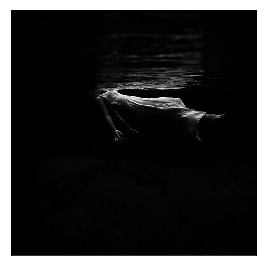

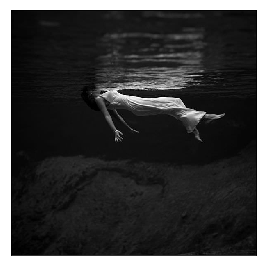

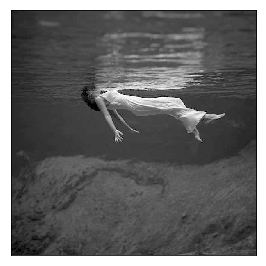

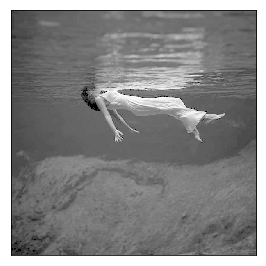

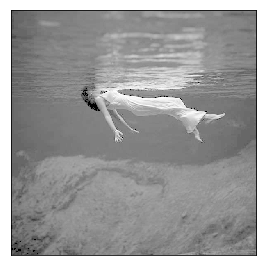

In [8]:
url_path = "https://i.imgur.com/ePm5gpo.jpg"    

# load image
img = io.imread(url_path)

# add the gamma value into list 
gamma_list = []
gamma_list.append(2)
gamma_list.append(1)
gamma_list.append(1/2)
gamma_list.append(1/3)
gamma_list.append(1/4)

# use for loop to show the images which do the gamma-correction with different value
for gamma in gamma_list:
    plt.figure()
    gamma_img = exposure.adjust_gamma(img,gamma)
    io.imshow(gamma_img)
    plt.yticks([])
    plt.xticks([])
    
#     io.imsave('slide_img/gamma_' + np.str(round(i,2)) +'.jpg',gamma_img) # save image


### Test if it is low contrast ``exposure.is_low_contrast(image)``

True


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([9.86732200e-01, 2.39825708e-03, 1.28278867e-03, 1.14056645e-03,
        8.86797386e-04, 6.91590414e-04, 4.68496732e-04, 6.44183007e-04,
        4.60130719e-04, 4.54553377e-04, 3.82047930e-04, 2.48191721e-04,
        3.26274510e-04, 1.39433551e-04, 3.48583878e-04, 1.50588235e-04,
        1.72897603e-04, 1.05969499e-04, 1.56165577e-04, 1.42222222e-04,
        1.45010893e-04, 1.36644880e-04, 1.28278867e-04, 1.67320261e-04,
        1.19912854e-04, 0.00000000e+00, 1.36644880e-04, 1.58954248e-04,
        1.36644880e-04, 0.00000000e+00, 1.28278867e-04, 1.28278867e-04,
        0.00000000e+00, 1.14335512e-04, 1.39433551e-04, 0.00000000e+00,
        1.28278867e-04, 0.00000000e+00, 1.19912854e-04, 0.00000000e+00,
        1.17124183e-04, 0.00000000e+00, 1.61742919e-04, 0.00000000e+00,
        1.17124183e-04, 0.00000000e+00, 1.33856209e-04, 0.00000000e+00,
        1.28278867e-04, 0.00000000e+00, 1.36644880e-04, 0.00000000e+00,
        0.00000000e+00, 1.81263617e-04, 0.00000000e+00, 1.728976

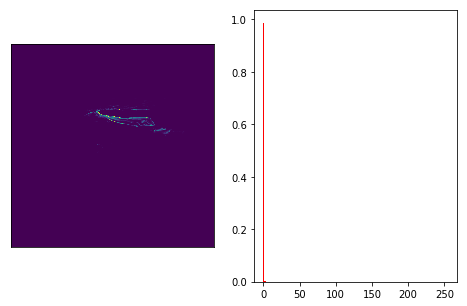

In [9]:
# use gamma to make the image dark
dark = exposure.adjust_gamma(img, 10)
result = exposure.is_low_contrast(dark)
print(result) # true

# return a copy of the array collapsed into one dimension
arr = dark.flatten()

plt.figure("hist",figsize=(8,5))
# primary image
plt.subplot(121)
plt.imshow(dark)
plt.yticks([])
plt.xticks([])

plt.subplot(122)
plt.hist(arr, bins=256, normed=1,edgecolor='None',facecolor='red') 


### Show the images with three types of correction (gamma、logarithmic、sigmoid) 

<Figure size 576x576 with 0 Axes>

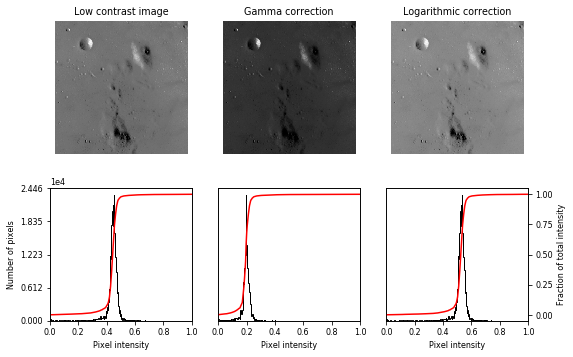

In [10]:
import matplotlib
import numpy as np

from skimage import img_as_float

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """
    Plot an image along with its histogram and cumulative histogram.
    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

plt.figure("hist",figsize=(8,8))

# Load an example image
img = data.moon()

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

# Some useful tool

# ``data_dir``

In [11]:
from skimage import data_dir

print(data_dir)
# C:\Users\USER\Anaconda3\envs\py3k\lib\site-packages\skimage\data

C:\Users\USER\Anaconda3\lib\site-packages\skimage\data


## Batch processing

This example is convert all the in-built image to gray level.

And save in the 'figures' folder.

In [12]:
from skimage import transform
import numpy as np
import os

def convert_gray(f,**args):
    rgb = io.imread(f)    
    gray = color.rgb2gray(rgb)              # convert rgb to gray
    dst = transform.resize(gray,(256,256))  # set image size (256,256)
    return dst
    
# * means all the .png file
str = data_dir + '/*.png'  

# load all the .png which has converted to gray
collection = io.ImageCollection(str, load_func = convert_gray)

# create a 'figures' folder in local
if not os.path.exists('figures/'):
    os.makedirs('figures')
    
# save image in local
for i in range(len(collection)):
    io.imsave('figures/'+np.str(i)+'.jpg',collection[i])  

C:\Users\USER\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\USER\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


## Load all the images from the path and store in the ndarray 
``io.ImageCollection(path)`` ：
Load and manage a collection of image files.

``io.concatenate_images(collection)``:
Concatenate all images in the image collection into an array.

This example is that using the concatenate_images to load the images which is done by last example to a mat array. And use the for loop to show the image.

28
(256, 256)
(28, 256, 256)


C:\Users\USER\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


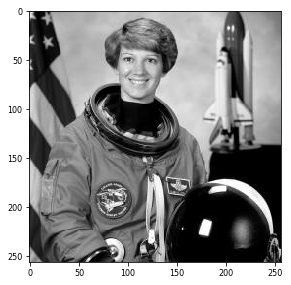

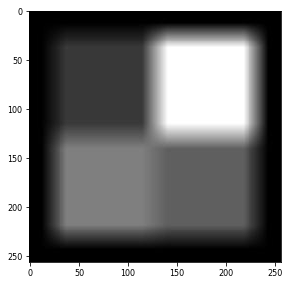

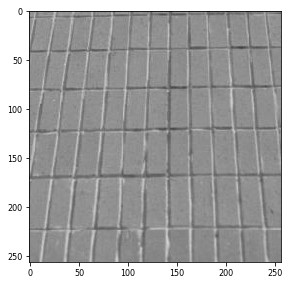

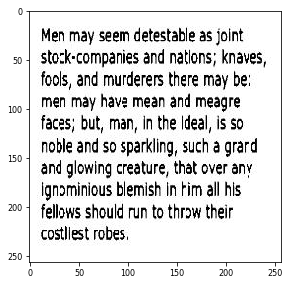

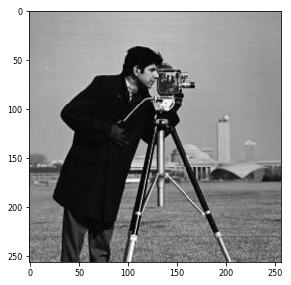

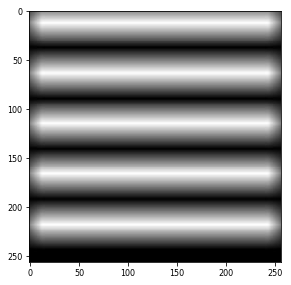

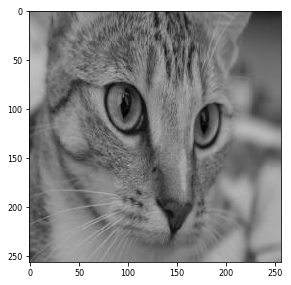

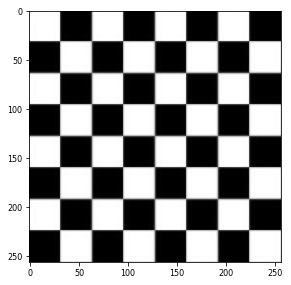

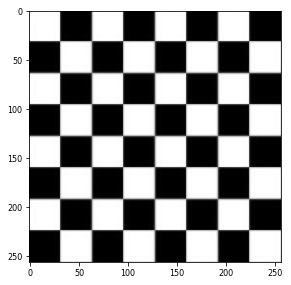

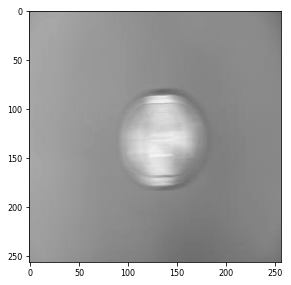

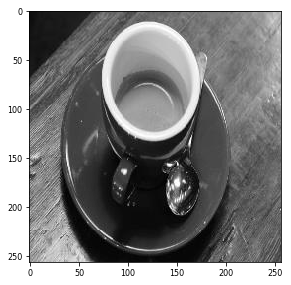

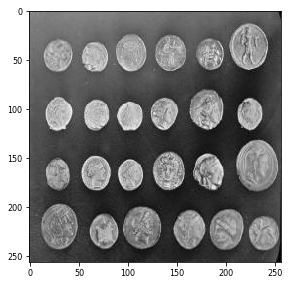

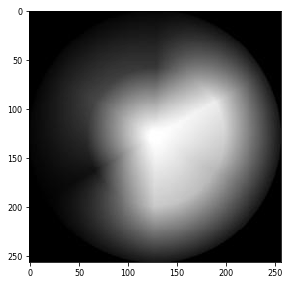

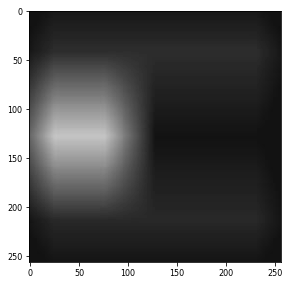

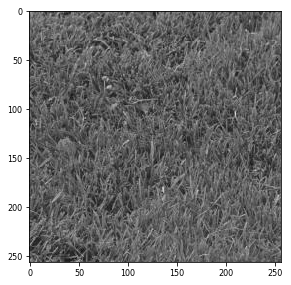

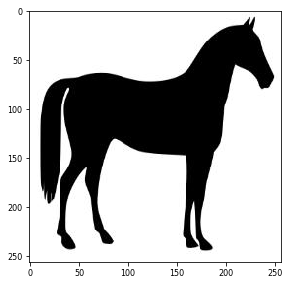

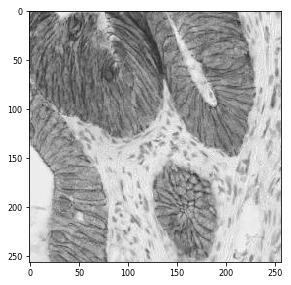

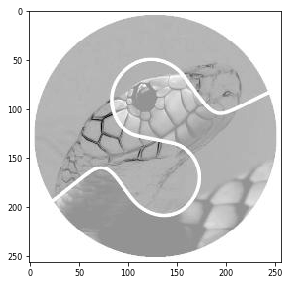

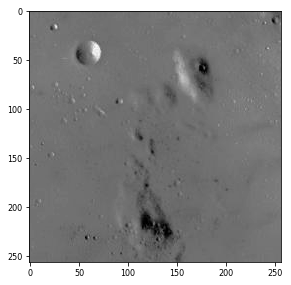

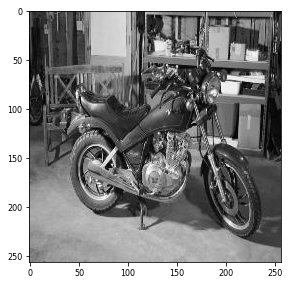

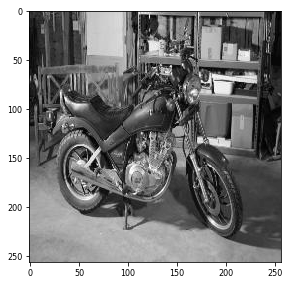

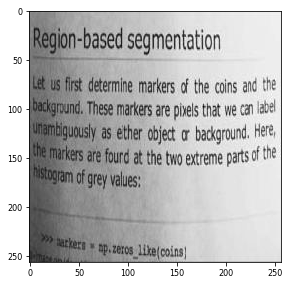

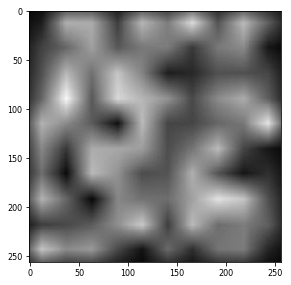

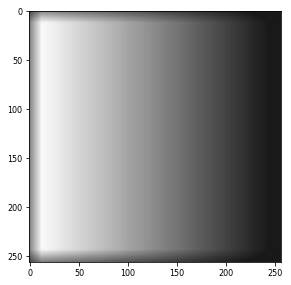

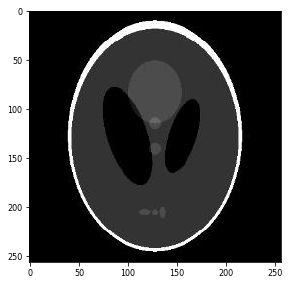

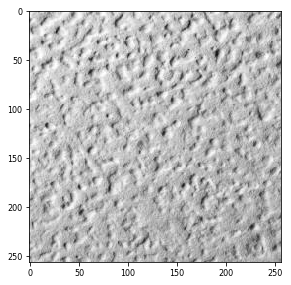

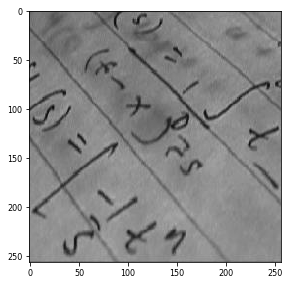

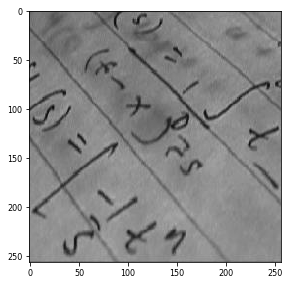

In [13]:
# the path of the 'figures' folder 
ImagePath = 'figures'
str = ImagePath+'/*.jpg'

collection = io.ImageCollection(str)    
print(len(collection))                  # the numbers of the images in the path
print(collection[0].shape)              # the image size (all the image should in the same size)
mat = io.concatenate_images(collection)
print(mat.shape)                        # the size after concatenate

for i in range(0,len(collection)):
    plt.figure()
    io.imshow(mat[i])